In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# Data Loading

In [4]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="ISO-8859-1")

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.shape

(5572, 5)

In [8]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Data Cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [14]:
filtered_values = data['Unnamed: 2'][data['Unnamed: 2'].notna()]

In [16]:
filtered_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [17]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [18]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
data.rename(columns={"v1":"outcome", "v2":"text"}, inplace=True)

In [22]:
data.head()

,outcome,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
data["outcome"] = encoder.fit_transform(data["outcome"])

In [28]:
data.head()

,outcome,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data.duplicated().sum()

403

In [31]:
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)

      outcome                                               text
2           1  Free entry in 2 a wkly comp to win FA Cup fina...
7           0  As per your request 'Melle Melle (Oru Minnamin...
8           1  WINNER!! As a valued network customer you have...
9           1  Had your mobile 11 months or more? U R entitle...
11          1  SIX chances to win CASH! From 100 to 20,000 po...
...       ...                                                ...
5524        1  You are awarded a SiPix Digital Camera! call 0...
5535        0  I know you are thinkin malaria. But relax, chi...
5539        0                         Just sleeping..and surfing
5553        0                        Hahaha..use your brain dear
5558        0                             Sorry, I'll call later

[684 rows x 2 columns]


In [32]:
duplicated_rows = data[data.duplicated()]
print(duplicated_rows)

      outcome                                               text
102         0  As per your request 'Melle Melle (Oru Minnamin...
153         0  As per your request 'Melle Melle (Oru Minnamin...
206         0  As I entered my cabin my PA said, '' Happy B'd...
222         0                             Sorry, I'll call later
325         0                   No calls..messages..missed calls
...       ...                                                ...
5524        1  You are awarded a SiPix Digital Camera! call 0...
5535        0  I know you are thinkin malaria. But relax, chi...
5539        0                         Just sleeping..and surfing
5553        0                        Hahaha..use your brain dear
5558        0                             Sorry, I'll call later

[403 rows x 2 columns]


In [33]:
data = data.drop_duplicates(keep="first")

In [36]:
data.duplicated().sum()

0

In [37]:
data.shape

(5169, 2)

# EDA

In [38]:
data["outcome"].value_counts()

outcome
0    4516
1     653
Name: count, dtype: int64

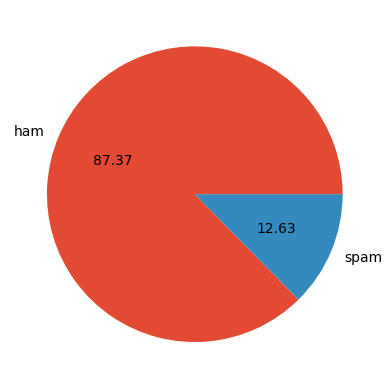

In [40]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.pie(data["outcome"].value_counts(), labels=["ham","spam"], autopct = "%0.2f")
plt.show()

In [42]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
data["num_char"] = data["text"].apply(len)

In [44]:
data.head()

,outcome,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
data["num_words"] = data["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [47]:
data.head()

,outcome,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [48]:
data["num_sentences"] = data["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [49]:
data.head()

,outcome,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
data.describe()

,outcome,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [51]:
data[data["outcome"]==0].describe() # ham data

,outcome,num_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,16.957484,1.815545
std,0.0,56.358207,13.394052,1.364098
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,219.000000,38.000000


In [52]:
data[data["outcome"]==1].describe() # spam data

,outcome,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.474732,2.969372
std,0.0,30.137753,6.893007,1.488910
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,44.000000,9.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='num_words', ylabel='Count'>

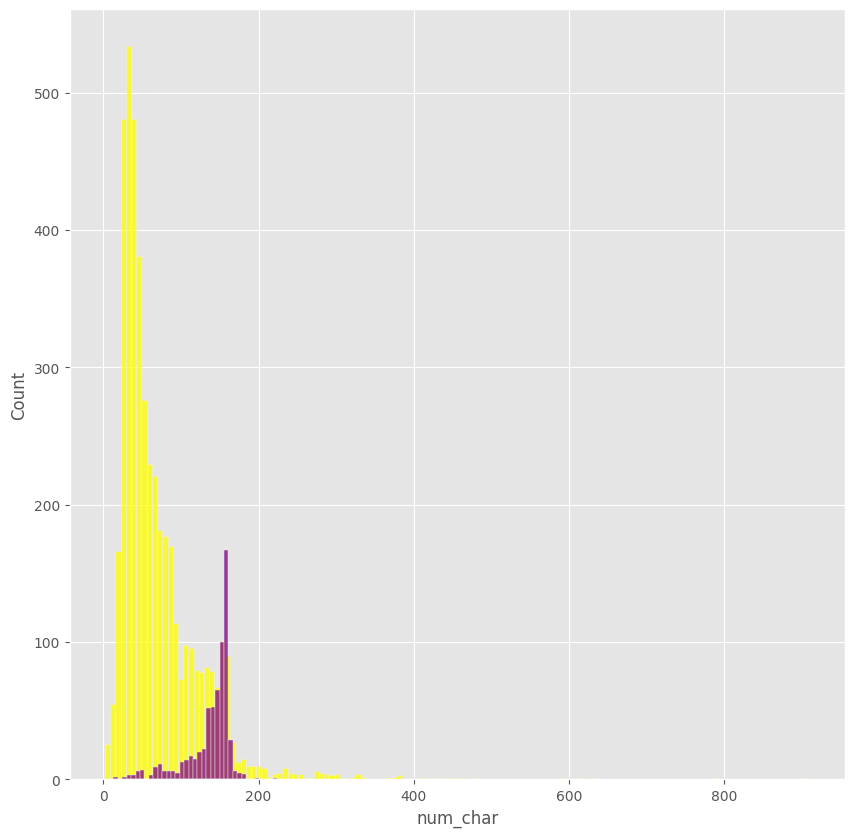

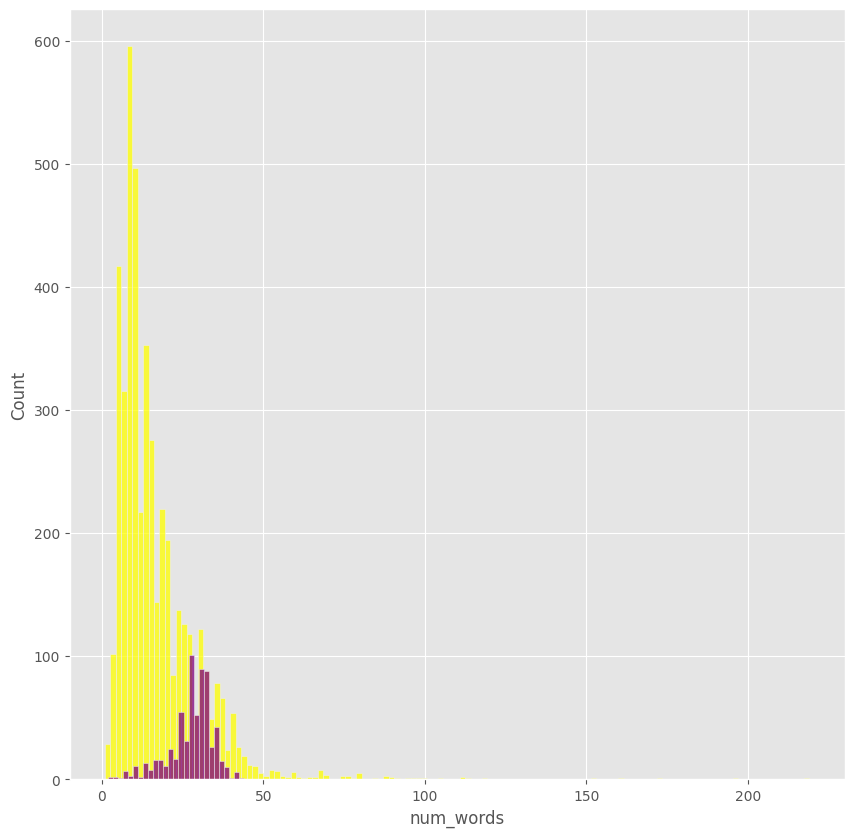

In [59]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.histplot(data[data['outcome'] == 0]['num_char'], color="yellow")
sns.histplot(data[data['outcome'] == 1]['num_char'], color='purple')
plt.figure(figsize=(10,10))
sns.histplot(data[data['outcome'] == 0]['num_words'], color="yellow")
sns.histplot(data[data['outcome'] == 1]['num_words'], color='purple')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

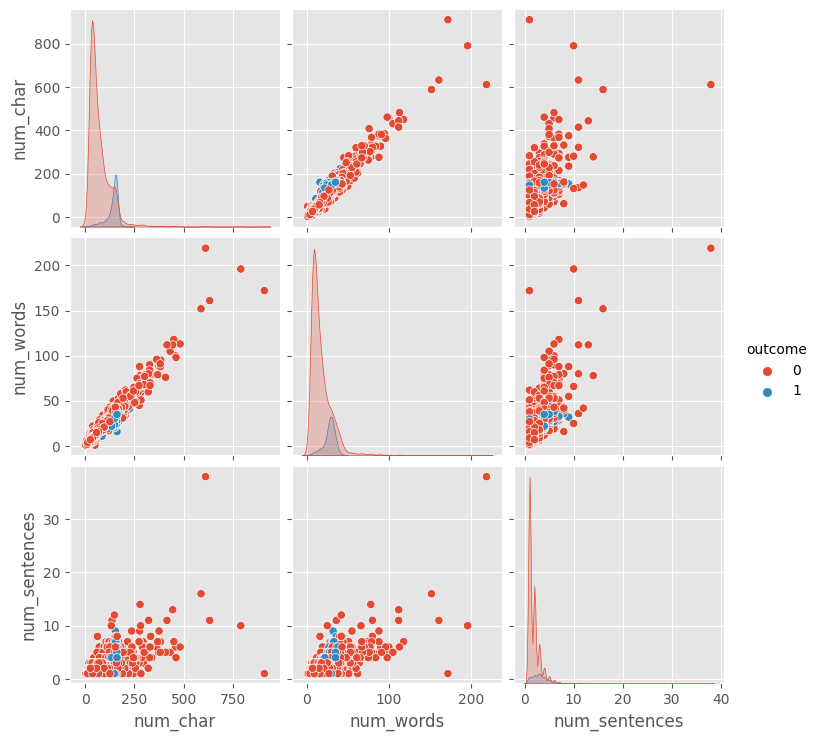

In [61]:
sns.pairplot(data,hue='outcome')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   outcome        5169 non-null   int64 
 1   text           5169 non-null   object
 2   num_char       5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sentences  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [65]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

In [66]:
correlation_matrix

,outcome,num_char,num_words,num_sentences
outcome,1.000000,0.384717,0.264198,0.267602
num_char,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


<Axes: >

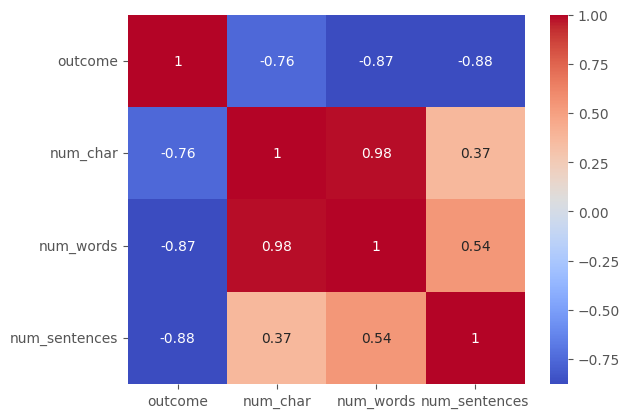

In [72]:
sns.heatmap(correlation_matrix.corr(),annot=True, cmap="coolwarm")

# Data Preprocessing

In [93]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [86]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [87]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [97]:
transform_text("I loved you")

'love'

In [84]:
data["text"].iloc[75:100]

75          I am waiting machan. Call me once you free.
76    Thats cool. i am a gentleman and will treat yo...
77    I like you peoples very much:) but am very shy...
78           Does not operate after  &lt;#&gt;  or what
79    Its not the same here. Still looking for a job...
80                               Sorry, I'll call later
81                     K. Did you call me just now ah? 
82                     Ok i am on the way to home hi hi
83                 You will be in the place of that man
84                                       Yup next stop.
85    I call you later, don't have network. If urgnt...
86    For real when u getting on yo? I only need 2 m...
87    Yes I started to send requests to make it but ...
88           I'm really not up to it still tonight babe
89            Ela kano.,il download, come wen ur free..
90    Yeah do! DonÛ÷t stand to close tho- youÛ÷ll ...
91    Sorry to be a pain. Is it ok if we meet anothe...
92    Smile in Pleasure Smile in Pain Smile when

In [81]:
data["text"][4250]

"Omg Joanna is freaking me out. She's looked thru all my friends to find photos of me. And then she's asking about stuff on my MySpace which I haven't even logged on in like a year. :/"

In [95]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [98]:
data['transformed_text'] = data['text'].apply(transform_text)

In [99]:
data.head()

,outcome,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [111]:
from wordcloud import WordCloud
w_c = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [112]:
spam_wc = w_c.generate(data[data["outcome"]==1]["transformed_text"].str.cat(sep=" "))

(-0.5, 499.5, 499.5, -0.5)

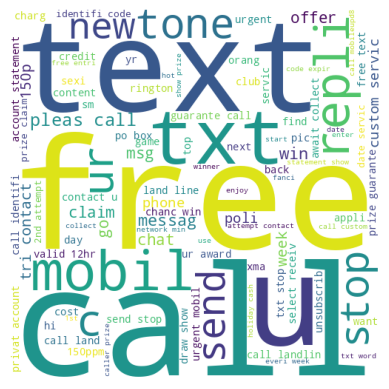

In [113]:
plt.imshow(spam_wc)
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

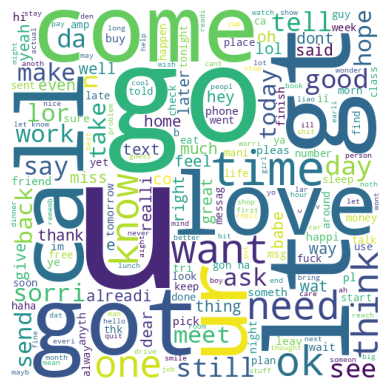

In [114]:
ham_wc = w_c.generate(data[data["outcome"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.axis("off")

In [115]:
spam_corpus = []
for msg in data[data["outcome"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [116]:
len(spam_corpus)

9883

In [120]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [121]:
ham_corpus = []
for msg in data[data['outcome'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [122]:
len(ham_corpus)

34771

In [123]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,272
7,got,236
8,like,234
9,know,234


# Model Building

In [137]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [138]:
X = tfidf.fit_transform(data["transformed_text"]).toarray()

In [139]:
X.shape

(5169, 6629)

In [140]:
y = data["outcome"].values

In [141]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [143]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [144]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

0.8539651837524178
[[763 126]
 [ 25 120]]
0.4878048780487805
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       889
           1       0.49      0.83      0.61       145

    accuracy                           0.85      1034
   macro avg       0.73      0.84      0.76      1034
weighted avg       0.90      0.85      0.87      1034



In [146]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(classification_report(y_test, y_pred2))

0.9622823984526112
[[888   1]
 [ 38 107]]
0.9907407407407407
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.74      0.85       145

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [147]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(classification_report(y_test, y_pred1))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       889
           1       0.49      0.83      0.61       145

    accuracy                           0.85      1034
   macro avg       0.73      0.84      0.76      1034
weighted avg       0.90      0.85      0.87      1034



In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [149]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [150]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [151]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [152]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9709864603481625, 0.9323308270676691)

In [153]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9709864603481625
Precision -  0.9323308270676691
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9622823984526112
Precision -  0.9907407407407407
For  DT
Accuracy -  0.937137330754352
Precision -  0.8225806451612904
For  LR
Accuracy -  0.9439071566731141
Precision -  0.865546218487395
For  RF
Accuracy -  0.9661508704061895
Precision -  0.9910714285714286
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8507462686567164
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8840579710144928
For  ETC
Accuracy -  0.9758220502901354
Precision -  1.0
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9615384615384616
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9606299212598425


In [154]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [155]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.975822,1.000000
5,RF,0.966151,0.991071
2,NB,0.962282,0.990741
9,GBDT,0.952611,0.961538
10,xgb,0.972921,0.960630
0,SVC,0.970986,0.932331
7,BgC,0.962282,0.884058
4,LR,0.943907,0.865546
6,AdaBoost,0.950677,0.850746


In [156]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [157]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.975822
2,RF,Accuracy,0.966151
3,NB,Accuracy,0.962282
4,GBDT,Accuracy,0.952611
5,xgb,Accuracy,0.972921
6,SVC,Accuracy,0.970986
7,BgC,Accuracy,0.962282
8,LR,Accuracy,0.943907
9,AdaBoost,Accuracy,0.950677


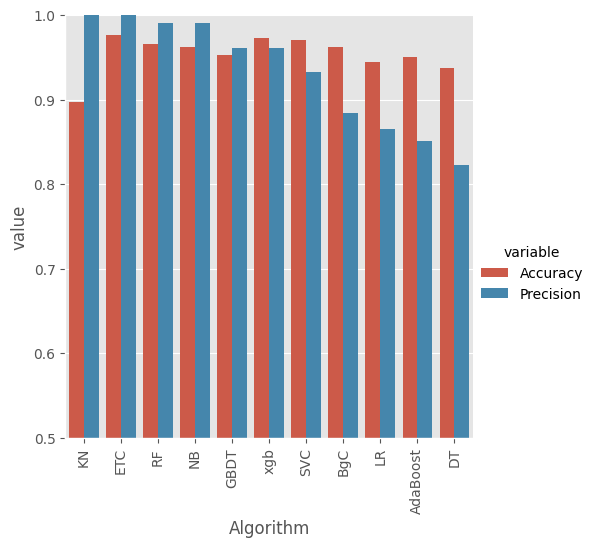

In [158]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [159]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [160]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [161]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [162]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [163]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [164]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000
1,ETC,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000
2,RF,0.966151,0.991071,0.966151,0.991071,0.966151,0.991071,0.966151,0.991071
3,NB,0.962282,0.990741,0.962282,0.990741,0.962282,0.990741,0.962282,0.990741
4,GBDT,0.952611,0.961538,0.952611,0.961538,0.952611,0.961538,0.952611,0.961538
5,xgb,0.972921,0.960630,0.972921,0.960630,0.972921,0.960630,0.972921,0.960630
6,SVC,0.970986,0.932331,0.970986,0.932331,0.970986,0.932331,0.970986,0.932331
7,BgC,0.962282,0.884058,0.962282,0.884058,0.962282,0.884058,0.962282,0.884058
8,LR,0.943907,0.865546,0.943907,0.865546,0.943907,0.865546,0.943907,0.865546
9,AdaBoost,0.950677,0.850746,0.950677,0.850746,0.950677,0.850746,0.950677,0.850746


In [165]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [166]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [167]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [168]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 1.0


In [169]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [170]:
from sklearn.ensemble import StackingClassifier

In [171]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [172]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9635036496350365


In [173]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))